# SARL for Portfolio Management on DJ30
This tutorial is to demonstrate an example of using SARL to do portfolio management on DJ30
## Set up Experinment Environment

In [ ]:
from IPython.display import clear_output
import argparse
import sys
import numpy as np
import torch
from torch import nn
import yaml
import os
import pandas as pd
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
requirements_path=module_path+"/requirements.txt"
print(requirements_path)
command="pip install -r "+requirements_path
os.system(command)
clear_output(wait=True)
! conda install pytorch torchvision torchaudio cudatoolkit=11.3 -c pytorch
clear_output(wait=True)

## Download and Preprocess the Data
The dataconfig part in TradeMaster is shared by all other parts, it is worth noticing that for algorithms trading, only the dataset BTC is supported.

The following code will help to download the data in the folder [.data/data/dj30](https://github.com/qinmoelei/TradeMaster_reframe/tree/master/tutorial/data/data/dj30), where 4 files could be found: the whole data and train, valid and test data which will be used when we try to construct the RL environment for the agent

In [ ]:
from data.download_data import Dataconfig
parser = argparse.ArgumentParser()

parser.add_argument("--data_path",
                    type=str,
                    default="./data/data/",
                    help="the path for storing the downloaded data")
#where we store the dataset
parser.add_argument(
    "--output_config_path",
    type=str,
    default="./config/output_config/data",
    help="the path for storing the generated config file for data")
# where we store the config file
parser.add_argument(
    "--dataset",
    choices=["exchange","dj30","sz50","crypto"],
    default="dj30",
    help="the name of the dataset",
)
parser.add_argument("--split_proportion",
                    type=list,
                    default=[0.8, 0.1, 0.1],
                    help="the split proportion for train, valid and test")
parser.add_argument(
    "--generate_config",
    type=bool,
    default=False,
    help=
    "determine whether to generate a yaml file to memorize the train valid and test'data's dict"
)
parser.add_argument(
    "--input_config",
    type=bool,
    default=False,
    help=
    "determine whether to use a yaml file as the overall input of the Dataconfig, this is needed when have other format of dataset"
)

parser.add_argument(
    "--input_config_path",
    type=str,
    default="config/input_config/data/custom.yml",
    help=
    "determine the location of a yaml file used to initialize the Dataconfig Class"
)
args = parser.parse_args(args=[])
a = Dataconfig(args)
clear_output(wait=True)
clear_output(wait=True)

In [ ]:
data=pd.read_csv("data/data/dj30/dj30.csv",index_col=0)
data.head(5)

## SARL Enviornment Construction, Agent Training, Model Picking and Testing
For the simplicity, we use the yaml file to store the configuration for the RL environment construction, which can be found [here](https://github.com/qinmoelei/TradeMaster_reframe/tree/master/tutorial/config/input_config/env/PM/portfolio_for_SARL)
### Encoder

In [3]:
from agent.SARL.encoder.encoder import encoder
import argparse


In [6]:
parser = argparse.ArgumentParser()

parser.add_argument("--data_path",
                    type=str,
                    default="./data/data/",
                    help="the path for storing the downloaded data")

#where we store the dataset
parser.add_argument(
    "--output_config_path",
    type=str,
    default="config/output_config/data",
    help="the path for storing the generated config file for data")

# where we store the config file
parser.add_argument(
    "--dataset",
    choices=["dj30", "sz50", "acl18", "futures", "crypto", "exchange"],
    default="dj30",
    help="the name of the dataset",
)

parser.add_argument("--split_proportion",
                    type=list,
                    default=[0.8, 0.1, 0.1],
                    help="the split proportion for train, valid and test")

parser.add_argument(
    "--generate_config",
    type=bool,
    default=True,
    help=
    "determine whether to generate a yaml file to memorize the train valid and test'data's dict"
)

parser.add_argument(
    "--input_config",
    type=bool,
    default=False,
    help=
    "determine whether to use a yaml file as the overall input of the Dataconfig, this is needed when have other format of dataset"
)

parser.add_argument(
    "--input_config_path",
    type=str,
    default="config/input_config/data/custom.yml",
    help=
    "determine the location of a yaml file used to initialize the Dataconfig Class"
)

parser.add_argument(
    "--encoder_path",
    type=str,
    default="./result/PM/SARL/encoder",
    help="the path for storing the generated encoder file for data")

parser.add_argument("--seed",
                    type=int,
                    default=12345,
                    help="the random seed to train the logic discriptor")

parser.add_argument(
    "--num_day",
    type=int,
    default=5,
    help="the number of the day for us to use to predict the label")

parser.add_argument(
    "--batch_size",
    type=int,
    default=64,
    help="the batch size of the data during the training process")

parser.add_argument("--hidden_size",
                    type=int,
                    default=128,
                    help="the size of the hidden nodes of MLP_reg ")

parser.add_argument(
    "--optimizer",
    choices=[
        "Adam", "SGD", "ASGD", "Rprop", "Adagrad", "Adadelta", "RMSprop",
        "Adamax", "SparseAdam", "LBFGS"
    ],
    default="Adam",
    help="the name of the optimizer",
)

parser.add_argument(
    "--num_epoch",
    type=int,
    default=5,
    help="the number of epoch",
)
parser.add_argument(
    "--input_encoder_config",
    type=bool,
    default=False,
    help=
    "determine whether to use a yaml file as the overall input of the logic_discriptor, this is needed when have other format of dataset"
)

parser.add_argument(
    "--input_encoder_config_dict",
    type=str,
    default="config/input_config/agent/SARL/encoder.yml",
    help=
    "determine the path of a yaml file as the overall input of the logic_discriptor"
)

parser.add_argument("--technical_indicator",
                    type=list,
                    default=[
                        "high", "low", "open", "close", "adjcp", "zopen",
                        "zhigh", "zlow", "zadjcp", "zclose", "zd_5", "zd_10",
                        "zd_15", "zd_20", "zd_25", "zd_30"
                    ],
                    help="the name of the features to predict the label")
parser.add_argument("--num_layer",
                    type=int,
                    default=1,
                    help="the number of layer in the LSTM")
parser.add_argument("--lr",
                    type=float,
                    default=1e-4,
                    help="the learning rate for encoder")
args = parser.parse_args(args=[])
a = encoder(args)
clear_output(wait=True)
clear_output(wait=True)


## RL

In [4]:
from agent.SARL.RL.trader import agent,env_creator,load_yaml,select_algorithms
import argparse
from env.PM.portfolio_for_SARL import TradingEnv as env

In [5]:
parser = argparse.ArgumentParser()

parser.add_argument(
    "--env_name",
    choices=["portfolio"],
    default="portfolio",
    help="the name of TradingEnv ",
)
parser.add_argument(
    "--dict_trained_model",
    default="result/PM/SARL/trained_model/",
    help="the dict of the trained model ",
)

parser.add_argument(
    "--train_env_config_dict",
    default="config/input_config/env/portfolio/portfolio_for_SARL/train.yml",
    help="the dict of the train config of TradingEnv ",
)

parser.add_argument(
    "--valid_env_config_dict",
    default="config/input_config/env/portfolio/portfolio_for_SARL/valid.yml",
    help="the dict of the valid config of TradingEnv ",
)

parser.add_argument(
    "--test_env_config_dict",
    default="config/input_config/env/portfolio/portfolio_for_SARL/test.yml",
    help="the dict of the test config of TradingEnv ",
)

parser.add_argument(
    "--name_of_algorithms",
    choices=["PPO", "A2C", "SAC", "TD3", "PG", "DDPG"],
    type=str,
    default="DDPG",
    help="name_of_algorithms ",
)
parser.add_argument(
    "--num_epochs",
    type=int,
    default=10,
    help="the number of training epoch",
)

parser.add_argument(
    "--random_seed",
    type=int,
    default=12345,
    help="the number of training epoch",
)

parser.add_argument(
    "--model_config_dict",
    type=str,
    default="config/input_config/agent/SOTA/DDPG.yml",
    help="the dict of the model_config file",
)

parser.add_argument(
    "--result_dict",
    type=str,
    default="result/PM/SARL/test_result/",
    help="the dict of the result of the test",
)
args = parser.parse_args(args=[])

a = agent(args)
a.train_with_valid()
a.test()

2022-08-21 02:09:37,621	INFO worker.py:973 -- Calling ray.init() again after it has already been called.
2022-08-21 02:09:37,633	WARNING deprecation.py:47 -- DeprecationWarning: `config['prioritized_replay']` has been deprecated. Replay prioritization specified at new location config['replay_buffer_config']['prioritized_replay'] will be overwritten. This will raise an error in the future!
2022-08-21 02:09:37,634	WARNING deprecation.py:47 -- DeprecationWarning: `config[prioritized_replay_alpha]` has been deprecated. config['replay_buffer_config'][prioritized_replay_alpha] should be used for Q-Learning algorithms. Ignore this warning if you are not using a Q-Learning algorithm and still provide prioritized_replay_alpha. This will raise an error in the future!
2022-08-21 02:09:37,635	WARNING deprecation.py:47 -- DeprecationWarning: `config[prioritized_replay_beta]` has been deprecated. config['replay_buffer_config'][prioritized_replay_beta] should be used for Q-Learning algorithms. Ignore

KeyboardInterrupt: 

Test Visualization

In [6]:
import pandas as pd
test_result=pd.read_csv("result/PM/SARL/test_result/result.csv",index_col=0)
test_result.head(5)

,daily_return,total assets
0,0.000000,10000.000000
1,0.000101,10001.008162
2,-0.002926,9971.743545
3,-0.000455,9967.209449
4,-0.005364,9913.747497


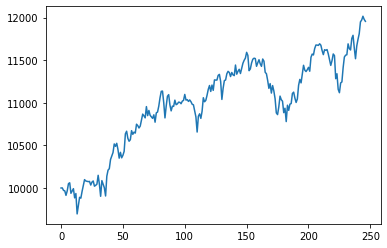

In [7]:
from matplotlib import pyplot as plt
x = range(len(test_result))
y = test_result["total assets"].tolist()
plt.plot(x, y)  
plt.show()